# 6 - Nearest Neighbours

This is a fun section. Nearest neighbours is a class of unsupervised algorithms
to investigate data.

They rely on the premise that similar things are close together, in feature space.

Making this assumption, we can do some interesting things like:

- Recommendations
- Find similar stuff

But more crucially, they provide an insight into the _character_ of the data.

This is really useful when you are given some data and you don't know what the
goal is.

## Loading the data

So, the data for this section is whiskey. We've already seen it in the presentation
and I find it fun to work with.

It is analogous to serious datasets too; you could imagine that instead of features
about the whiskey, they could be features about competitors products or about
customers.

In [1]:
# Usual imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

### Tasks:

- Read the CSV data from "data/whiskies.csv" (look up `pandas.read_csv` for help, or see the second workshop)

In [2]:
whiskey = pd.read_csv('data/whiskies.csv')
display(whiskey.head())
print(whiskey.columns)

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,PH15 2EB,286580,749680
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,AB38 9PJ,326340,842570
2,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,AB5 5LI,352960,839320
3,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,PA42 7EB,141560,646220
4,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,AB54 4NH,355350,829140


Index(['Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco',
       'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral',
       'Postcode', ' Latitude', ' Longitude'],
      dtype='object')


We can see that there are several features here that we don't want to leak into our dataset.

We're interested in how close the taste of whiskies are, not how geographically close 
(although we think that this will be the result!)

In [3]:
cols = ['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco',
       'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']
X = whiskey[cols]
y = whiskey['Distillery']
display(X.head())
display(y.head())

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


0    Aberfeldy
1     Aberlour
2       AnCnoc
3       Ardbeg
4      Ardmore
Name: Distillery, dtype: object

## Distance measures

First let's define a distance measure.

We defined quite a few in the presentation, but it's always best to start with the simplest
thing possible. So let's write a euclieanDistance method...

$$
d_{Euclidean}(\mathbf{x}, \mathbf{y}) = ||\mathbf{x} - \mathbf{y}||=\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + ...}
$$

In [4]:
import math
def euclideanDistance(instance1, instance2):
    distance = 0
    for x in range(len(instance1)):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

One thing that we haven't talked much about is test driven development (TDD).

(If you're not all software engineers) TDD is the idea that all code is backed by
a test to prove that it does what it is intended to do.

TDD states that tests should be written first.

It's quite handy to sprinkle these throughout a notebook to make sure your custom
methods do what they are supposed to do...

In [5]:
from unittest import *
class TestDistance(TestCase):
    def testSimple(self):
        # Your code here
        pass
    def test2D(self):
        self.assertAlmostEqual(euclideanDistance([0, 0], [1, 1]), 1.4, places=1)

suite = TestLoader().loadTestsFromModule(TestDistance())
TextTestRunner(verbosity=2).run(suite) ;

test2D (__main__.TestDistance) ... ok
testSimple (__main__.TestDistance) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.016s

OK


### Tasks

- Try writing another simple test that passes (See the [unittest documentation](https://docs.python.org/3/library/unittest.html))

## Nearest neighbour

Now we have a measure of distance, let's write an algorithm to get the nearest neighbours..

In [6]:
import operator 
def getNeighbors(trainingSet, instance, k):
    """Return the first k locations of the nearest neighbours to an instance"""
    distances = []
    for x in range(len(trainingSet)):
        dist = euclideanDistance(instance, trainingSet[x])
        distances.append(dist)
    locs = np.argsort(distances)
    return locs[:k]

To test whether this works, let's define a test instance that we want to compare.

We expect that the test instance is the nearest match, then some more matches.

In [7]:
testInstance = X.loc[y == 'Laphroig']
display(testInstance)

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
58,4,2,4,4,1,0,0,1,1,1,0,0


In [8]:
neighbors = getNeighbors(X.as_matrix(), testInstance.as_matrix()[0], 5)
print(y[neighbors])

58     Laphroig
57    Lagavulin
3        Ardbeg
23    Clynelish
21     Caol Ila
Name: Distillery, dtype: object


Great. If you know your domain (I know a little, at least about smokey whiskies :-) ) 
then we can see that these are pretty resonable recommendations.

### Tasks:

- Generate some recommendations for whiskies based upon the ones that you like. (Change the `testInstance` above)
- Advanced users: Try another distance measure?

## K-NN

Nearest neighbours is great for similarity measures, but we can also use it for
classification and regression.

This is accomplished by finding the most similar observations and setting the
predicted classification as some combination of the k-nearest neighbours. 
(e.g. the most common)

This time, let's use a classification dataset like the `iris` dataset and 
let's use the inbuilt k-NN implementation in `sklearn`.

In [9]:
from sklearn import datasets
from sklearn import neighbors

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

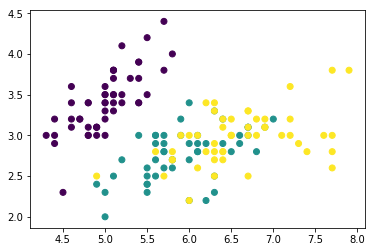

In [10]:
# Quick plot to see what we're dealing with
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Now let's write a fancy method to plot the decision boundaries...

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        

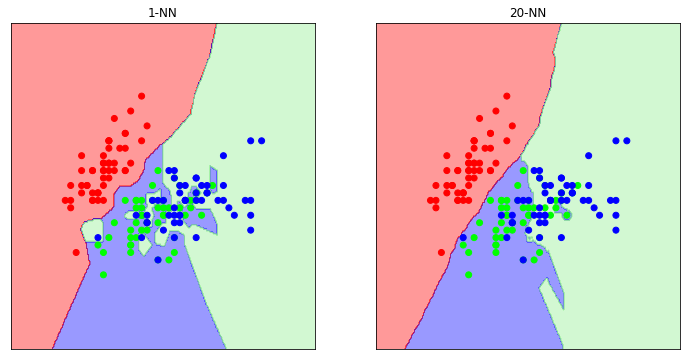

In [12]:
figure = plt.figure(figsize=(12, 6))
n_neighbours = [1, 20]
i = 1
for n in n_neighbours:
    clf = neighbors.KNeighborsClassifier(n, weights='distance')
    clf.fit(X, y)
    ax = plt.subplot(1, len(n_neighbours), i)
    i += 1

    plot_decision_regions(X=X, y=y, classifier=clf)
    ax.set_xticks(())
    ax.set_yticks(())
    plt.title(str(n) + '-NN')

plt.show()

Generally we can see that the more neighbours we use, the smoother the result becomes.

### Bonus Tasks:

- Try plotting validation curves on this dataset for different values of k